# Lead Scoring Case Study

### Problem Statement :
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Our Goals of the Case Study:

 - To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
 - To adjust to if the company's requirement changes in the future so you will need to handle these as well.


#### The steps are broadly:

- Read and understand the data
- Clean the data
- Prepare the data for Model Building
- Model Building
- Model Evaluation
- Making Predictions on the Test Set

In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries

import numpy as np
import pandas as pd

import time, warnings
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = None

## Importing the "Leads" Dataset


In [3]:
# Read the dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we see that there are few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

# Step 1 : Data Cleaning and EDA

In [7]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [8]:
# drop the columns having missing values greater than 3000
for c in leads.columns:
    if leads[c].isnull().sum()>3000:
        leads.drop(c, axis=1,inplace=True)

In [9]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [10]:
leads.shape

(9240, 31)

In [11]:
# Checking the value counts in 'City' column
leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Mumbai has highest numbers of leads

the variable City won't be of any use in our analysis. So it's best that we drop it.

In [12]:
leads.drop(['City'], axis = 1, inplace = True)


In [13]:
# Checking the value counts in 'Country' column
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

India has the highest leads

drop this column as it is not important

In [14]:
leads.drop(['Country'] , axis = 1 , inplace = True)

In [15]:
# check the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

There are a few columns in which there is a level called 'Select' which  means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and So we will identify the value counts of the level 'Select' in all the columns that it is present.

In [17]:
# checking the value counts of all the columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_

There aare 3 columns that have level 'Select' , Lets check them one by one

In [ ]:
# Visualizing these variables which have 'select' in it
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [18]:
#Lead Profile
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [19]:
# How did you hear about X Education
leads['How did you hear about X Education'].astype('category').value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [20]:
# Specialization
leads['Specialization'].astype('category').value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

As  the levels of "Lead Profile" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis

So it's best that we drop them.

In [21]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also we notice that, when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque.

Since  all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [22]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also ,notice that the variable 'What matters most to you in choosing a course' has the level 'Better Career Prospects' 6528 times while the other two levels appear once twice and once respectively. 

So we should drop this column as well.

In [23]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

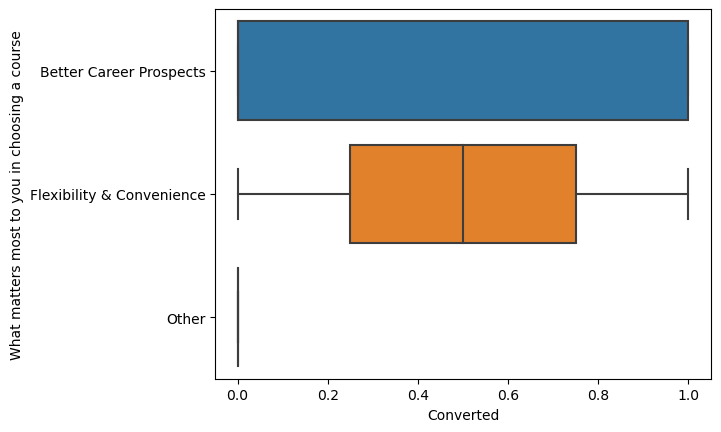

In [24]:
sns.boxplot(y = 'What matters most to you in choosing a course', x = 'Converted', data = leads)
plt.show()

'What matters most to you in choosing a course' has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [25]:
# drop the column
leads.drop(['What matters most to you in choosing a course'],axis=1, inplace = True)

In [26]:
# Check the number of null values again
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

now the number of null values present in the columns are quite small we'll drop the rows in which these null values are present.

In [27]:
# Drop the null value rows in the column 'TotalVisits'
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [28]:
# Check the number of null values again
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

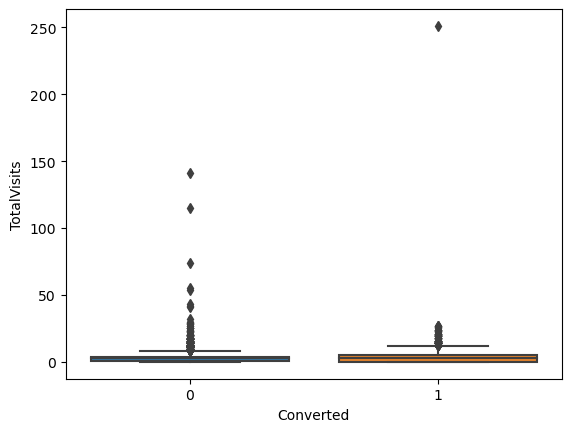

In [29]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

Insight:

- Median for converted and not converted leads are the same. Nothing can be concluded on the basis of Total Visits.

In [30]:
# Drop the null value rows in the column 'Specialization'
leads = leads[~pd.isnull(leads['Specialization'])]

In [31]:
# Check the number of null values again
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation           1270
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [32]:
# Drop the null value rows in the column 'Lead Source'
leads = leads[~pd.isnull(leads['Lead Source'])]

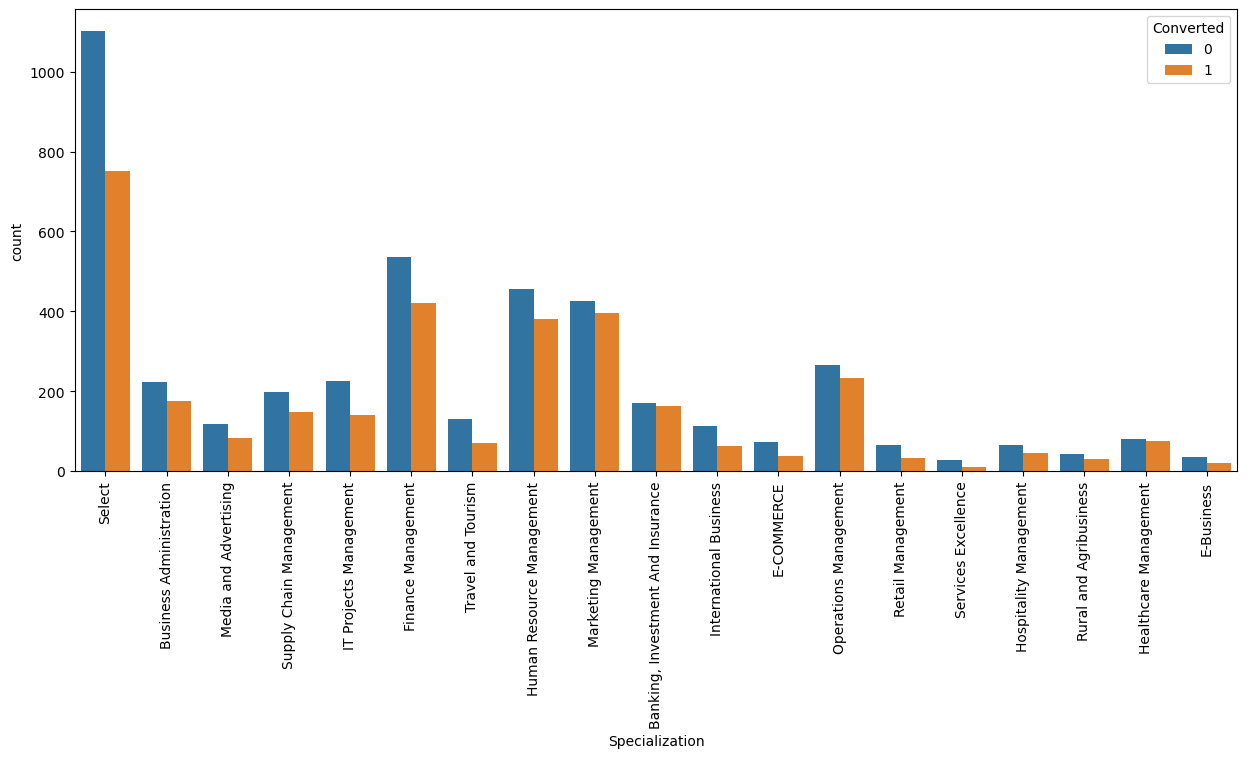

In [33]:
# visualize
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

Insights:
- Focus should be more on the Specialization with high conversion rate.

In [34]:
# Check the number of null values again
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation           1270
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

. Let's now check the percentage of rows that we have retained.

In [35]:
print(len(leads.index))
print(len(leads.index)/9240)

7643
0.8271645021645022


drop the features 'Prospect ID' and 'Lead Number' as these are useless for our analysis

In [36]:
# Dropping the "Prospect ID" and "Lead Number" 
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [37]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


##### Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [38]:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

42.96742116969776

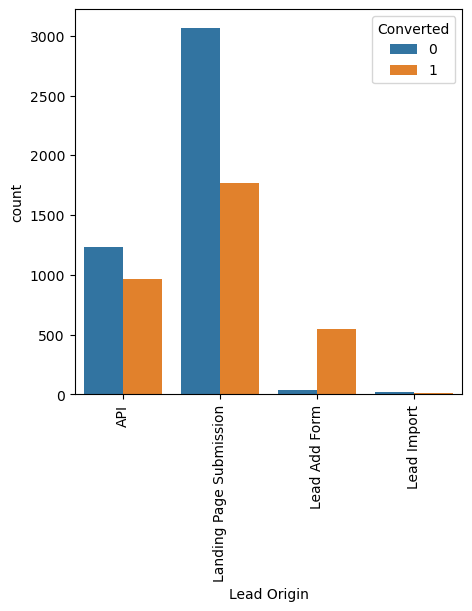

In [39]:
# Lead Origin
plt.figure(figsize=(5,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

Insights :
- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.



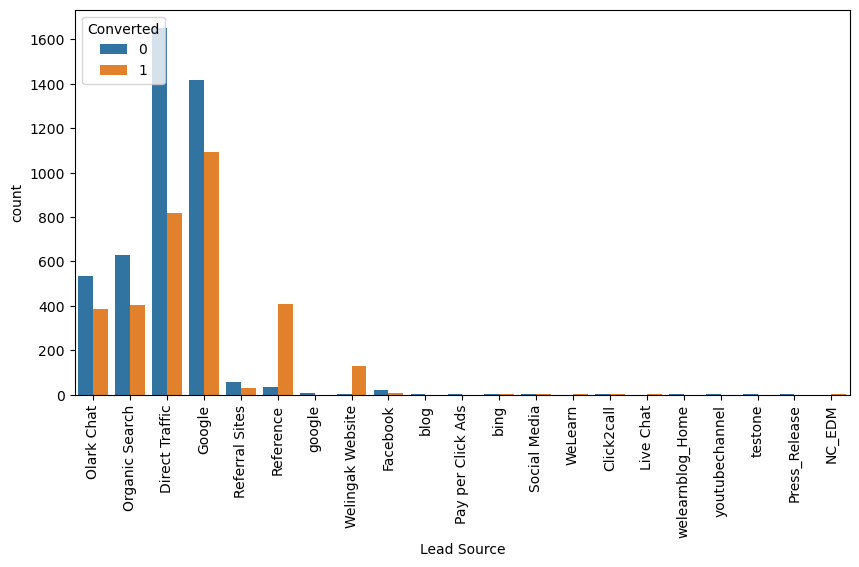

In [40]:
# Lead Source
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

In [41]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 
'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [42]:
# Need to replace 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

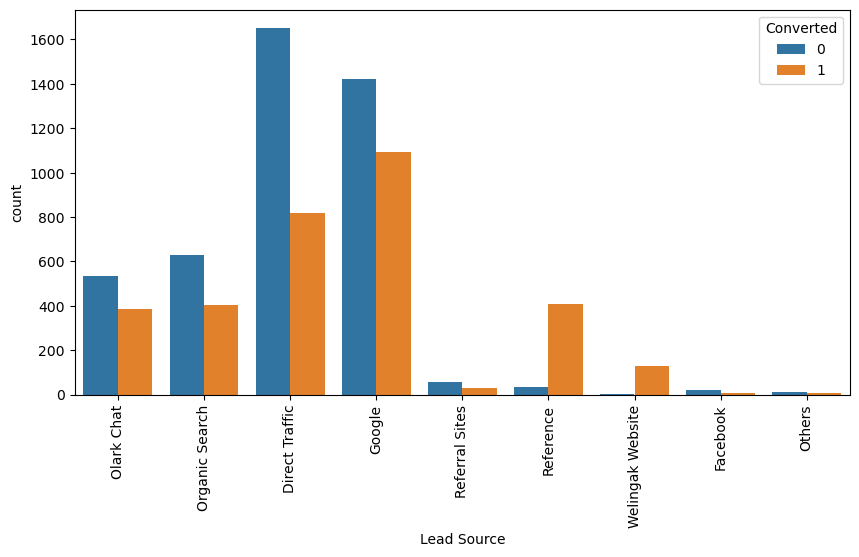

In [43]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

Insight:
- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.



(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

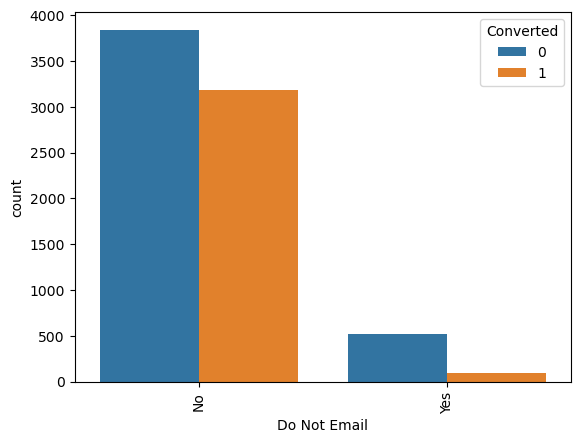

In [44]:
# Do Not Email
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

Insight:
Most entries are 'No'. No Inference can be drawn with this parameter.

In [45]:
# TotalVisits
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    7643.000000
mean        3.811723
std         5.088462
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        18.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

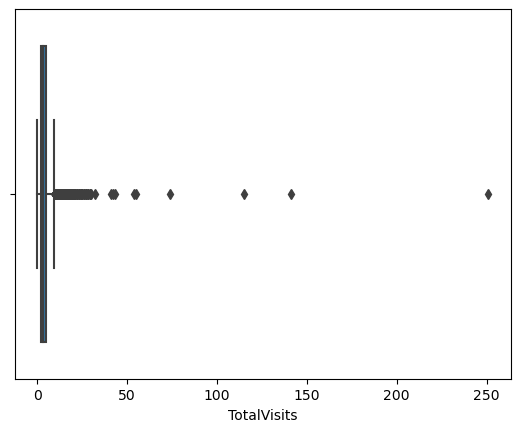

In [46]:
sns.boxplot(leads['TotalVisits'])


As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.



In [47]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

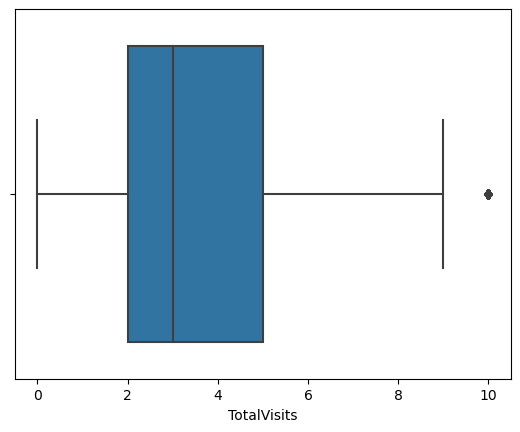

In [48]:
# Visualizing again
sns.boxplot(leads['TotalVisits'])
plt.show()

Insight:
- Median for converted and not converted leads are the same.
Nothing can be concluded on the basis of Total Visits.

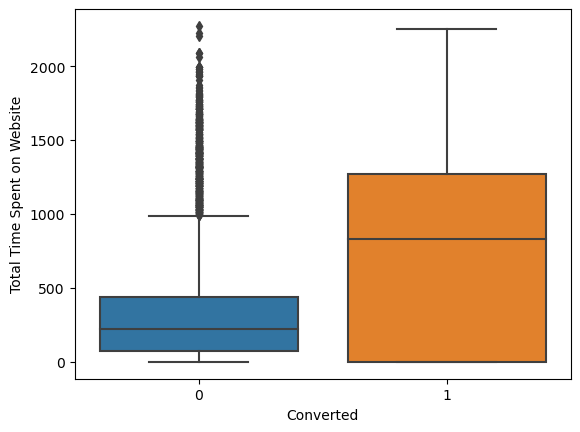

In [49]:
# Total Time Spent on Website
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

Insighta
 - Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

In [50]:
# Last Activity
leads['Last Activity'].describe()


count             7643
unique              16
top       Email Opened
freq              2989
Name: Last Activity, dtype: object

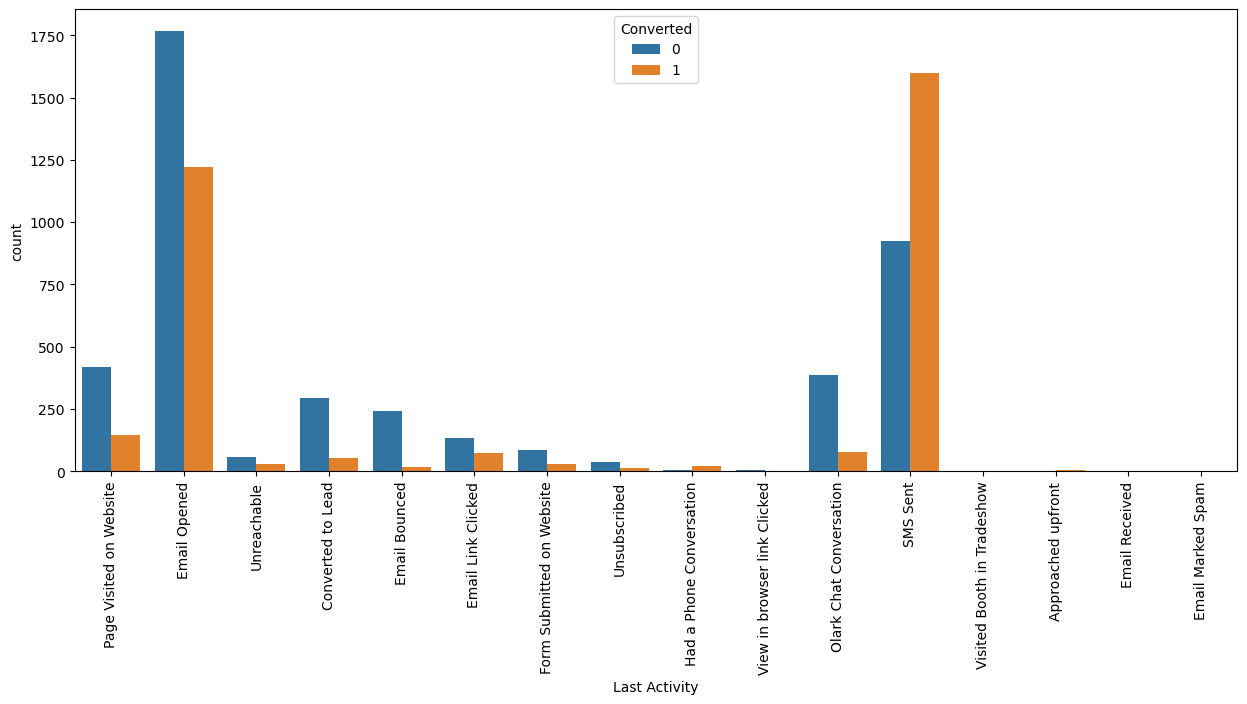

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

In [52]:
# We can club the last activities to "Other_Activity" which are having less data.
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

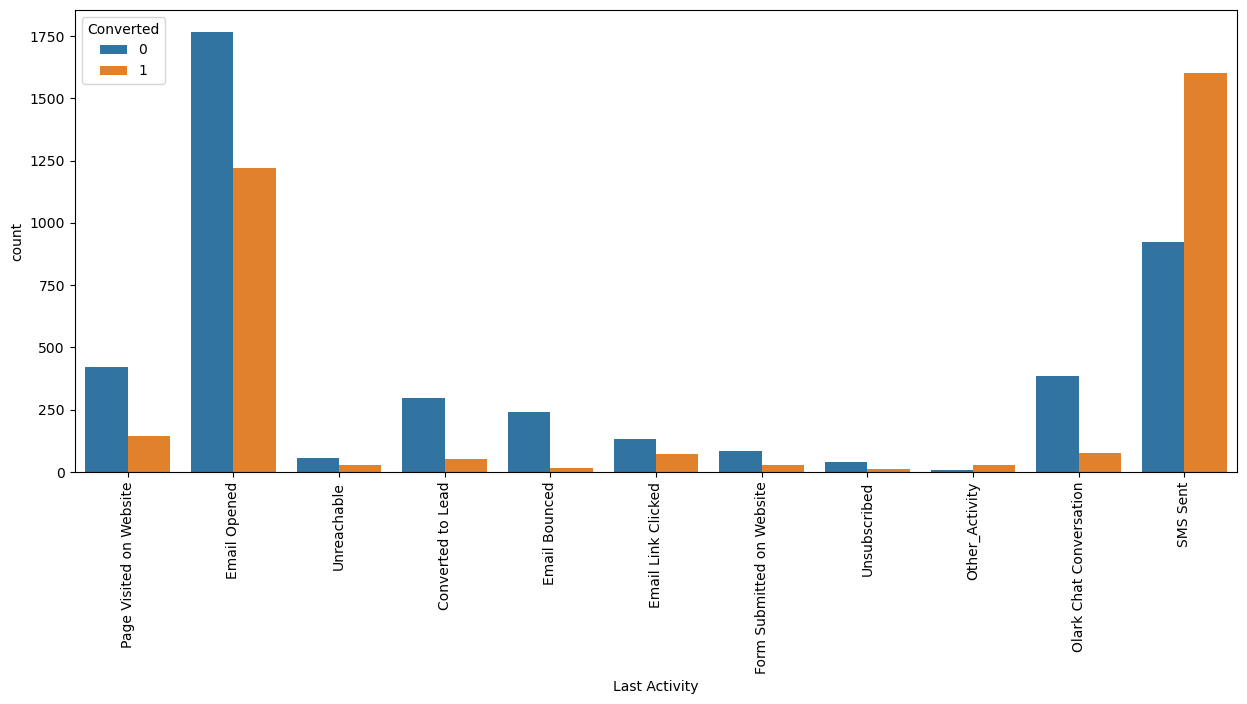

In [53]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

Insights:
- Most of the lead have their Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent is almost 60%.

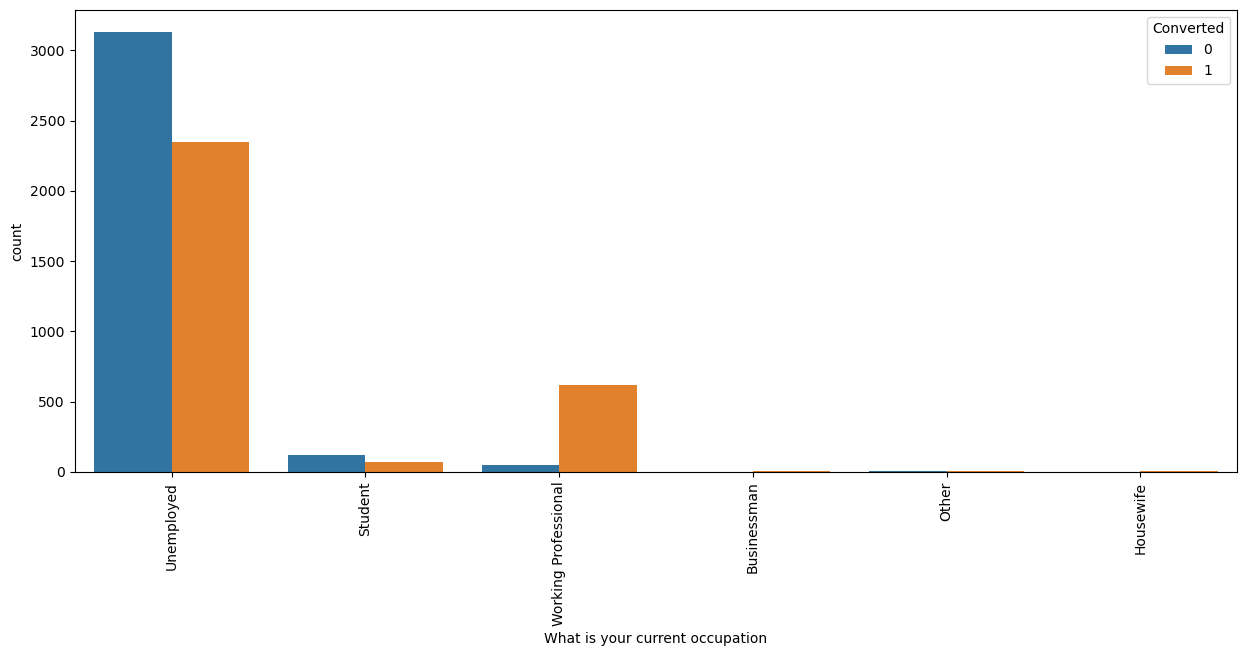

In [54]:
#  What is your current occupation
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

Insighta:
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.

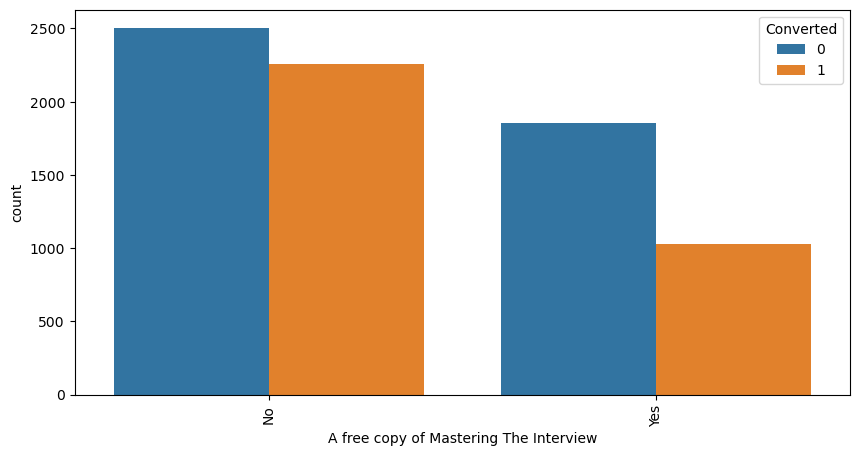

In [55]:
# A free copy of Mastering The Interview
plt.figure(figsize=(10,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

Insights
- Most entries are 'No'. No Inference can be drawn with this parameter.



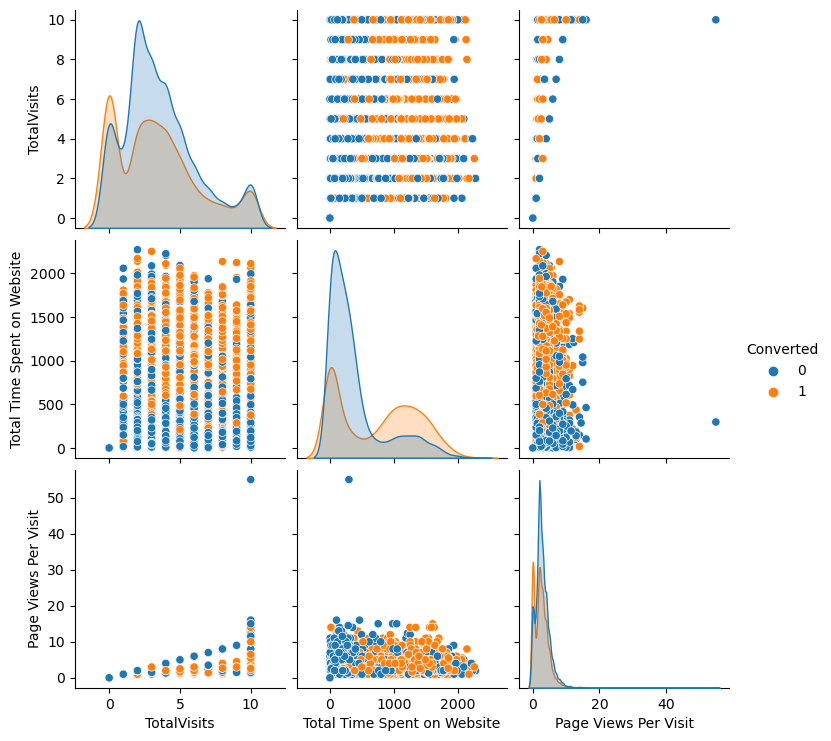

In [56]:

sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

In [57]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [ ]:
# Observing Correlation

plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

### Dummy variable creation
- The next step is to dealing with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.



In [58]:
leads = pd.get_dummies(leads,drop_first=True,dtype="int64")

In [59]:
# take a look at leads dataset
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Train - Test Split
split the data into training and testing set

In [60]:
# Import the library
from sklearn.model_selection import train_test_split

In [61]:
# Put all the feature variables in X

X = leads.drop(['Converted'],axis= 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [62]:
# Put the target variable in y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
y.shape

(7643,)

In [64]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5350, 63)
(2293, 63)
(5350,)
(2293,)


## Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [66]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [67]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9023,0.6,0.115317,0.109091,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
32,0.4,0.098151,0.036364,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1095,0.2,0.237236,0.036364,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4082,0.1,0.129842,0.018182,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1248,0.2,0.658891,0.036364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### `Looking at the correlations
Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

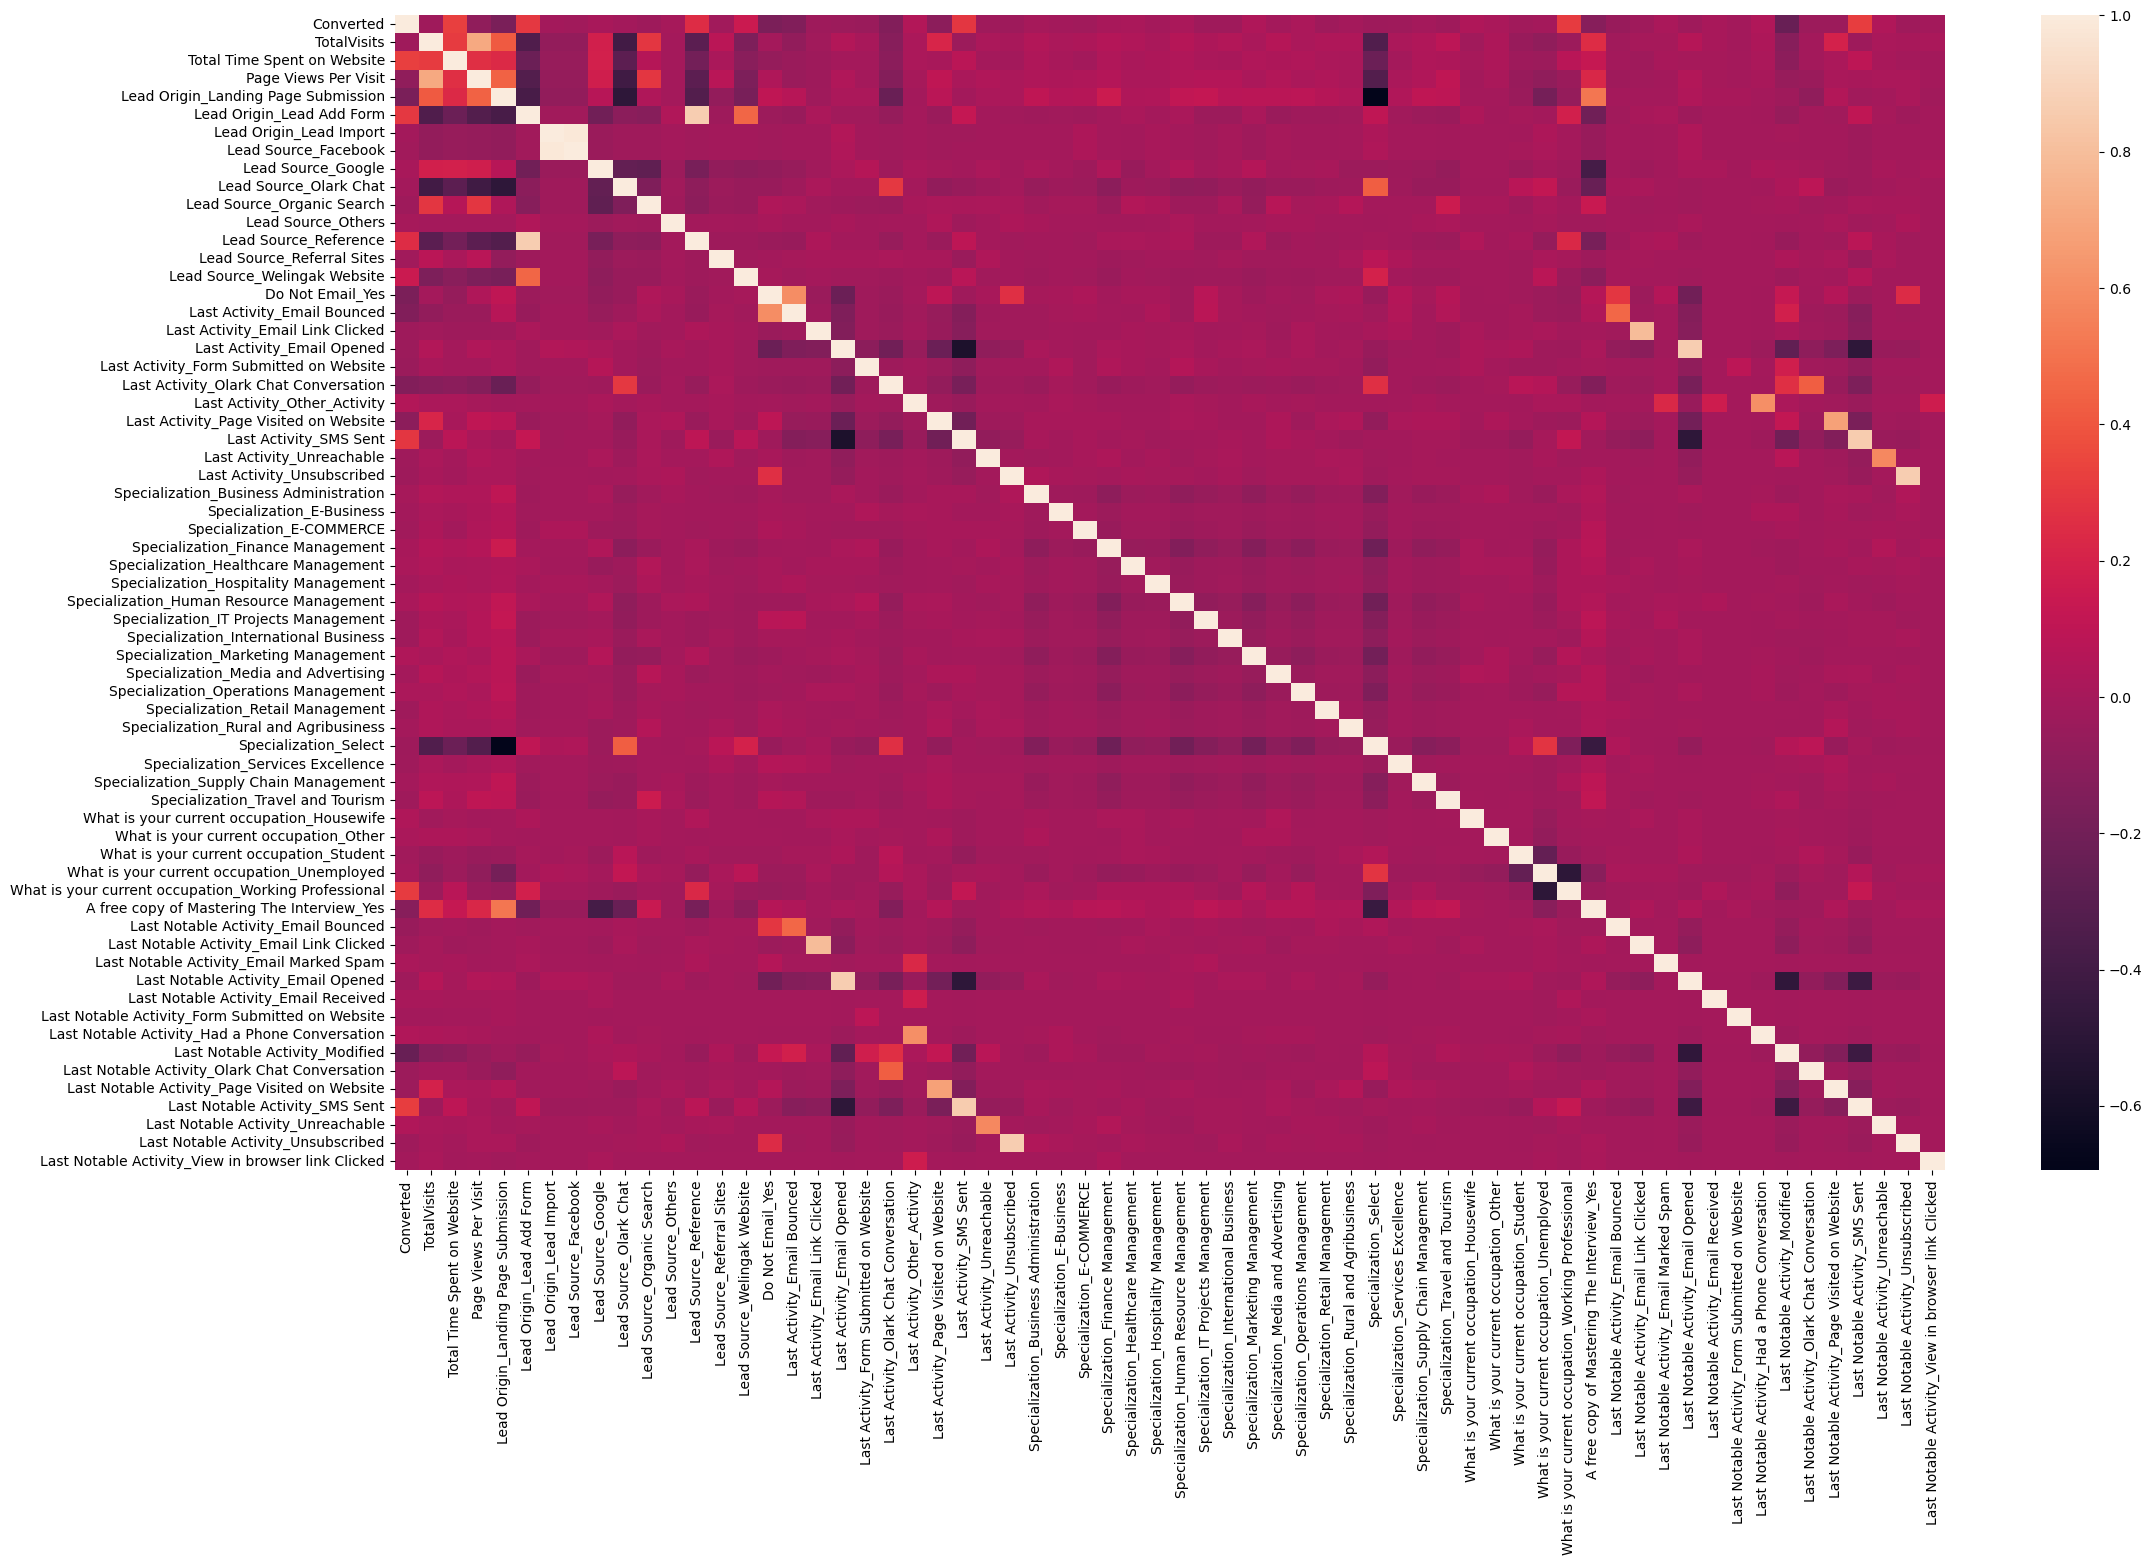

In [68]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

## Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [69]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 49),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 44),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Form Submitted on Website', False, 42),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Other_Activity', False, 2),
 ('Last Activity_Page Visited on Website', False, 30),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreac

In [72]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [73]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [74]:
# Import statsmodels
import statsmodels.api as sm

## Model 1

In [75]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5334
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2364.7
Date:                Fri, 15 Sep 2023   Deviance:                       4729.4
Time:                        11:41:49   Pearson chi2:                 5.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3855
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6368      0.154    -23.585      0.000      -3.939      -3.335
TotalVisits                                              1.5206      0.196      7.765      0.000       1.137       1.904
Total Time Spent on Website                              4.4232      0.173     25.603      0.000       4.085       4.762
Page Views Per Visit                                    -6.6971      1.464     -4.575      0.000      -9.566      -3.828
Lead Origin_Lead Add Form                                4.0028      0.248     16.173      0.000       3.518       4.488
Lead Source_Olark Chat                                   1.5122      0.132     11.492      0.000       1.254       1.770
Lead Source_Welingak Website                             1.7597      0.755      2.330      0.020       0.280       3.240
Do Not Email_Yes                                        -1.5444      0.177     -8.738      0.000      -1.891      -1.198
Last Activity_SMS Sent                                   1.3223      0.078     16.995      0.000       1.170       1.475
What is your current occupation_Housewife               24.1449   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
What is your current occupation_Other                    2.9140      0.848      3.437      0.001       1.252       4.576
What is your current occupation_Student                  1.3290      0.241      5.510      0.000       0.856       1.802
What is your current occupation_Unemployed               1.2458      0.115     10.877      0.000       1.021       1.470
What is your current occupation_Working Professional     3.9245      0.221     17.752      0.000       3.491       4.358
Last Notable Activity_Had a Phone Conversation           3.5838      1.135      3.156      0.002       1.358       5.809
Last Notable Activity_Unreachable                        2.3685      0.543      4.365      0.000       1.305       3.432
========================================================================================================================
"""

In [76]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,5.22
2,Page Views Per Visit,4.84
11,What is your current occupation_Unemployed,3.33
1,Total Time Spent on Website,2.25
3,Lead Origin_Lead Add Form,1.71
7,Last Activity_SMS Sent,1.56
4,Lead Source_Olark Chat,1.45
12,What is your current occupation_Working Profes...,1.44
5,Lead Source_Welingak Website,1.34
10,What is your current occupation_Student,1.09


In [78]:
# dropping 'What is your current occupation_Housewife' as it has high p-value
X_train.drop(['What is your current occupation_Housewife'] , axis = 1, inplace = True)

## Model 2

In [79]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5335
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2372.9
Date:                Fri, 15 Sep 2023   Deviance:                       4745.8
Time:                        11:41:49   Pearson chi2:                 5.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3836
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5849      0.152    -23.509      0.000      -3.884      -3.286
TotalVisits                                              1.5137      0.195      7.745      0.000       1.131       1.897
Total Time Spent on Website                              4.4191      0.172     25.643      0.000       4.081       4.757
Page Views Per Visit                                    -6.7327      1.461     -4.609      0.000      -9.596      -3.869
Lead Origin_Lead Add Form                                4.0351      0.248     16.294      0.000       3.550       4.520
Lead Source_Olark Chat                                   1.5058      0.131     11.460      0.000       1.248       1.763
Lead Source_Welingak Website                             1.7233      0.755      2.282      0.022       0.243       3.204
Do Not Email_Yes                                        -1.5494      0.177     -8.772      0.000      -1.896      -1.203
Last Activity_SMS Sent                                   1.3132      0.078     16.910      0.000       1.161       1.465
What is your current occupation_Other                    2.8711      0.847      3.388      0.001       1.210       4.532
What is your current occupation_Student                  1.2828      0.240      5.336      0.000       0.812       1.754
What is your current occupation_Unemployed               1.2026      0.113     10.648      0.000       0.981       1.424
What is your current occupation_Working Professional     3.8803      0.220     17.624      0.000       3.449       4.312
Last Notable Activity_Had a Phone Conversation           3.5680      1.133      3.150      0.002       1.348       5.788
Last Notable Activity_Unreachable                        2.3506      0.542      4.338      0.000       1.289       3.413
========================================================================================================================
"""

In [80]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,5.22
2,Page Views Per Visit,4.84
10,What is your current occupation_Unemployed,3.32
1,Total Time Spent on Website,2.25
3,Lead Origin_Lead Add Form,1.70
7,Last Activity_SMS Sent,1.56
4,Lead Source_Olark Chat,1.45
11,What is your current occupation_Working Profes...,1.44
5,Lead Source_Welingak Website,1.34
9,What is your current occupation_Student,1.09


In [81]:
# dropping vaiable Lead 'Source_Welingak Website'
X_train.drop(['Lead Source_Welingak Website'] , axis = 1, inplace = True)

## Model 3

In [82]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5336
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2376.8
Date:                Fri, 15 Sep 2023   Deviance:                       4753.7
Time:                        11:41:50   Pearson chi2:                 5.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3827
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5889      0.153    -23.521      0.000      -3.888      -3.290
TotalVisits                                              1.5146      0.195      7.750      0.000       1.132       1.898
Total Time Spent on Website                              4.4190      0.172     25.642      0.000       4.081       4.757
Page Views Per Visit                                    -6.7444      1.461     -4.617      0.000      -9.608      -3.881
Lead Origin_Lead Add Form                                4.3454      0.236     18.432      0.000       3.883       4.807
Lead Source_Olark Chat                                   1.5059      0.131     11.458      0.000       1.248       1.763
Do Not Email_Yes                                        -1.5320      0.175     -8.762      0.000      -1.875      -1.189
Last Activity_SMS Sent                                   1.3165      0.078     16.967      0.000       1.164       1.469
What is your current occupation_Other                    2.8733      0.847      3.390      0.001       1.212       4.534
What is your current occupation_Student                  1.2735      0.241      5.273      0.000       0.800       1.747
What is your current occupation_Unemployed               1.2061      0.113     10.670      0.000       0.985       1.428
What is your current occupation_Working Professional     3.8764      0.220     17.591      0.000       3.444       4.308
Last Notable Activity_Had a Phone Conversation           3.5700      1.133      3.152      0.002       1.350       5.790
Last Notable Activity_Unreachable                        2.3498      0.542      4.334      0.000       1.287       3.413
========================================================================================================================
"""

In [83]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,5.22
2,Page Views Per Visit,4.84
9,What is your current occupation_Unemployed,3.32
1,Total Time Spent on Website,2.25
6,Last Activity_SMS Sent,1.56
4,Lead Source_Olark Chat,1.45
10,What is your current occupation_Working Profes...,1.42
3,Lead Origin_Lead Add Form,1.37
8,What is your current occupation_Student,1.09
5,Do Not Email_Yes,1.07


In [84]:
# dropping vaiable Lead 'What is your current occupation_Other'
X_train.drop(['What is your current occupation_Other'] , axis = 1, inplace = True)

## Model 4`

In [85]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5337
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2384.1
Date:                Fri, 15 Sep 2023   Deviance:                       4768.2
Time:                        11:41:50   Pearson chi2:                 5.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3810
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5419      0.151    -23.462      0.000      -3.838      -3.246
TotalVisits                                              1.5278      0.195      7.826      0.000       1.145       1.910
Total Time Spent on Website                              4.4245      0.172     25.710      0.000       4.087       4.762
Page Views Per Visit                                    -6.7085      1.457     -4.604      0.000      -9.564      -3.853
Lead Origin_Lead Add Form                                4.3526      0.236     18.475      0.000       3.891       4.814
Lead Source_Olark Chat                                   1.5180      0.131     11.558      0.000       1.261       1.775
Do Not Email_Yes                                        -1.5194      0.174     -8.732      0.000      -1.860      -1.178
Last Activity_SMS Sent                                   1.3047      0.077     16.857      0.000       1.153       1.456
What is your current occupation_Student                  1.2177      0.241      5.063      0.000       0.746       1.689
What is your current occupation_Unemployed               1.1527      0.111     10.363      0.000       0.935       1.371
What is your current occupation_Working Professional     3.8227      0.219     17.428      0.000       3.393       4.253
Last Notable Activity_Had a Phone Conversation           3.5513      1.130      3.143      0.002       1.336       5.766
Last Notable Activity_Unreachable                        2.3275      0.541      4.300      0.000       1.267       3.388
========================================================================================================================
"""

In [86]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,5.21
2,Page Views Per Visit,4.84
8,What is your current occupation_Unemployed,3.30
1,Total Time Spent on Website,2.25
6,Last Activity_SMS Sent,1.56
4,Lead Source_Olark Chat,1.44
9,What is your current occupation_Working Profes...,1.42
3,Lead Origin_Lead Add Form,1.37
7,What is your current occupation_Student,1.09
5,Do Not Email_Yes,1.07


In [87]:
# dropping vaiable Lead 'Last Notable Activity_Had a Phone Conversation'
X_train.drop(['Last Notable Activity_Had a Phone Conversation'] , axis = 1, inplace = True)

## Model 5

In [88]:
# Refit the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5338
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2392.5
Date:                Fri, 15 Sep 2023   Deviance:                       4785.0
Time:                        11:41:50   Pearson chi2:                 5.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3791
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5304      0.151    -23.429      0.000      -3.826      -3.235
TotalVisits                                              1.5460      0.195      7.946      0.000       1.165       1.927
Total Time Spent on Website                              4.4104      0.172     25.693      0.000       4.074       4.747
Page Views Per Visit                                    -6.7695      1.454     -4.656      0.000      -9.619      -3.920
Lead Origin_Lead Add Form                                4.3436      0.235     18.446      0.000       3.882       4.805
Lead Source_Olark Chat                                   1.5081      0.131     11.501      0.000       1.251       1.765
Do Not Email_Yes                                        -1.5246      0.174     -8.772      0.000      -1.865      -1.184
Last Activity_SMS Sent                                   1.2935      0.077     16.742      0.000       1.142       1.445
What is your current occupation_Student                  1.2121      0.240      5.044      0.000       0.741       1.683
What is your current occupation_Unemployed               1.1550      0.111     10.398      0.000       0.937       1.373
What is your current occupation_Working Professional     3.8210      0.219     17.438      0.000       3.392       4.250
Last Notable Activity_Unreachable                        2.3139      0.541      4.277      0.000       1.253       3.374
========================================================================================================================
"""

In [89]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,5.21
2,Page Views Per Visit,4.84
8,What is your current occupation_Unemployed,3.30
1,Total Time Spent on Website,2.25
6,Last Activity_SMS Sent,1.55
4,Lead Source_Olark Chat,1.44
9,What is your current occupation_Working Profes...,1.42
3,Lead Origin_Lead Add Form,1.37
7,What is your current occupation_Student,1.09
5,Do Not Email_Yes,1.07


In [90]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

9023    0.157394
32      0.172170
1095    0.219924
4082    0.145384
1248    0.868414
3837    0.963088
1655    0.704268
659     0.295809
7640    0.526067
4577    0.976333
dtype: float64

In [91]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15739421, 0.17217037, 0.21992408, 0.145384  , 0.86841357,
       0.96308828, 0.70426782, 0.29580907, 0.52606708, 0.97633262])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [92]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.157394
1,0,0.172170
2,0,0.219924
3,0,0.145384
4,0,0.868414


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0


In [93]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.157394,0
1,0,0.172170,0
2,0,0.219924,0
3,0,0.145384,0
4,0,0.868414,1


## Model Evaluation

Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.



In [94]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [95]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2578  428]
 [ 653 1691]]


In [96]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [97]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Calculate the sensitivity

TP/(TP+FN)


0.7214163822525598

In [99]:
# Calculate the specificity

TN/(TN+FP)

0.8576180971390552

#### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [100]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

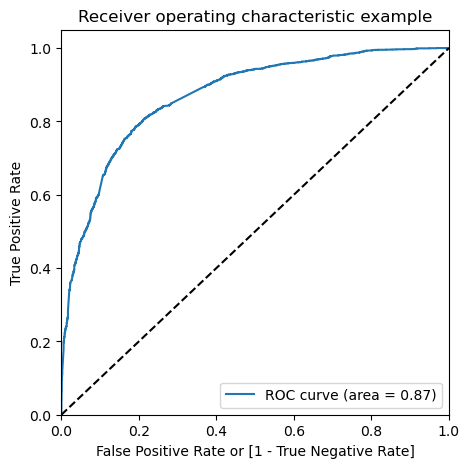

In [102]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [103]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.157394,0,1,1,0,0,0,0,0,0,0,0
1,0,0.172170,0,1,1,0,0,0,0,0,0,0,0
2,0,0.219924,0,1,1,1,0,0,0,0,0,0,0
3,0,0.145384,0,1,1,0,0,0,0,0,0,0,0
4,0,0.868414,1,1,1,1,1,1,1,1,1,1,0


In [104]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.438131  1.000000  0.000000
0.1   0.1  0.563178  0.987201  0.232535
0.2   0.2  0.710841  0.934727  0.536261
0.3   0.3  0.774393  0.845990  0.718563
0.4   0.4  0.798131  0.784130  0.809049
0.5   0.5  0.797944  0.721416  0.857618
0.6   0.6  0.787103  0.651877  0.892548
0.7   0.7  0.751028  0.520904  0.930472
0.8   0.8  0.728411  0.433874  0.958084
0.9   0.9  0.664860  0.253840  0.985363


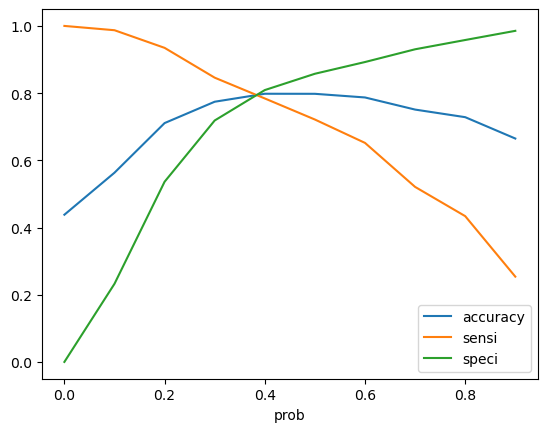

In [105]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.



In [106]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.157394,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.172170,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.219924,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.145384,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.868414,1,1,1,1,1,1,1,1,1,1,0,1


In [107]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7985046728971963

In [108]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[2464,  542],
       [ 536, 1808]], dtype=int64)

In [109]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [110]:
# Calculate Sensitivity

TP/(TP+FN)


0.7713310580204779

In [111]:
# Calculate Specificity

TN/(TN+FP)

0.8196939454424484

This cutoff point seems pretty good..

## Making Predictions on the Test Set
Let's now make predicitons on the test set.



In [112]:
X_test.shape , X_train.shape

((2293, 63), (5350, 11))

In [113]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [114]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Do Not Email_Yes', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [ ]:

       'Last Activity_SMS Sent',
       'Last Notable Activity_Unreachable

In [115]:
col = X_train.columns
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Do Not Email_Yes', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [117]:
X_train.shape , X_test.shape

((5350, 11), (2293, 63))

In [118]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
3879,0.2,0.170335,0.036364,0,0,0,0,0,0,0,0
4168,0.3,0.197623,0.054545,0,0,0,1,0,0,1,0
7510,0.2,0.102553,0.036364,0,0,0,1,0,1,0,0
2935,0.4,0.724472,0.072727,0,0,0,1,0,1,0,0
7245,1.0,0.842430,0.066727,0,0,0,1,0,1,0,0


In [119]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [120]:
# Check X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
3879,1.0,0.2,0.170335,0.036364,0,0,0,0,0,0,0,0
4168,1.0,0.3,0.197623,0.054545,0,0,0,1,0,0,1,0
7510,1.0,0.2,0.102553,0.036364,0,0,0,1,0,1,0,0
2935,1.0,0.4,0.724472,0.072727,0,0,0,1,0,1,0,0
7245,1.0,1.0,0.842430,0.066727,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,1.0,0.3,0.065581,0.054545,0,0,0,1,0,1,0,0
3605,1.0,0.2,0.078785,0.036364,0,0,0,0,0,0,0,0
6718,1.0,0.5,0.038292,0.090909,0,0,1,0,0,1,0,0
4451,1.0,0.5,0.110035,0.090909,0,0,0,1,0,0,0,0


In [121]:
X_train.shape , X_test.shape

((5350, 11), (2293, 11))

In [122]:
X_train.columns , X_test.columns

(Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
        'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
        'Do Not Email_Yes', 'Last Activity_SMS Sent',
        'What is your current occupation_Student',
        'What is your current occupation_Unemployed',
        'What is your current occupation_Working Professional',
        'Last Notable Activity_Unreachable'],
       dtype='object'),
 Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
        'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
        'Do Not Email_Yes', 'Last Activity_SMS Sent',
        'What is your current occupation_Student',
        'What is your current occupation_Unemployed',
        'What is your current occupation_Working Professional',
        'Last Notable Activity_Unreachable'],
       dtype='object'))

In [124]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

3879    0.062028
4168    0.927587
7510    0.362011
2935    0.903721
7245    0.976517
787     0.181263
2208    0.295809
8182    0.093955
4055    0.295809
138     0.388411
dtype: float64

In [125]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
# Let's see the head

y_pred_1.head()

,0
3879,0.062028
4168,0.927587
7510,0.362011
2935,0.903721
7245,0.976517


In [127]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [128]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [129]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [130]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.062028
1,1,0.927587
2,0,0.362011
3,1,0.903721
4,1,0.976517


In [131]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [132]:
# Let's see the head of y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob
0,0,0.062028
1,1,0.927587
2,0,0.362011
3,1,0.903721
4,1,0.976517


In [133]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [134]:
# Check y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob,final_predicted
0,0,0.062028,0
1,1,0.927587,1
2,0,0.362011,0
3,1,0.903721,1
4,1,0.976517,1


In [136]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7932839075447012

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1094,  259],
       [ 215,  725]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Calculate sensitivity
TP / float(TP+FN)


0.7712765957446809

In [140]:
# Calculate specificity
TN / float(TN+FP)


0.8085735402808574

### Precision-Recall View
Let's now also build the training model using the precision-recall view



In [141]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2578,  428],
       [ 653, 1691]], dtype=int64)

###  Precision
TP / TP + FP



In [142]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7980179329872581

### Recall
TP / TP + FN



In [143]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])


0.7214163822525598

### Precision and recall tradeoff

In [144]:
from sklearn.metrics import precision_recall_curve


In [145]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5345    0
 5346    1
 5347    1
 5348    0
 5349    1
 Name: Converted, Length: 5350, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 5345    0
 5346    1
 5347    1
 5348    0
 5349    1
 Name: Predicted, Length: 5350, dtype: int64)

In [146]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


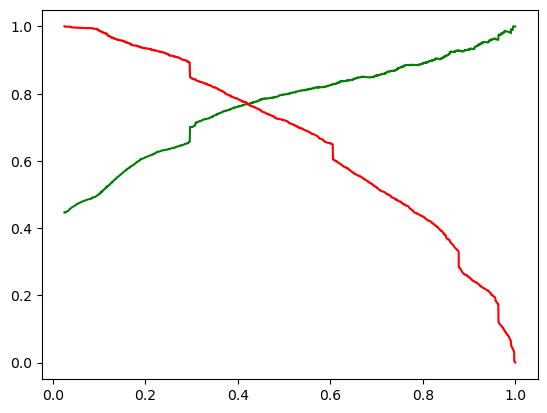

In [147]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.157394,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.172170,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.219924,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.145384,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.868414,1,1,1,1,1,1,1,1,1,1,0,1


In [149]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7977570093457944

In [150]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[2494,  512],
       [ 570, 1774]], dtype=int64)

In [151]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [152]:
# Calculate Precision

TP/(TP+FP)


0.7760279965004374

In [153]:
# Calculate Recall

TP/(TP+FN)


0.7568259385665529

This cutoff point seems good to go!

### Making Predictions on the Test Set
Let's now make predicitons on the test set.



In [154]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))


In [155]:
y_test_pred[:10]


3879    0.062028
4168    0.927587
7510    0.362011
2935    0.903721
7245    0.976517
787     0.181263
2208    0.295809
8182    0.093955
4055    0.295809
138     0.388411
dtype: float64

In [156]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)


In [157]:
# Let's see the head

y_pred_1.head()

,0
3879,0.062028
4168,0.927587
7510,0.362011
2935,0.903721
7245,0.976517


In [158]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)


In [159]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [161]:
# Check 'y_pred_final'

y_pred_final.head()


,Converted,0
0,0,0.062028
1,1,0.927587
2,0,0.362011
3,1,0.903721
4,1,0.976517


In [162]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


In [163]:
# Let's see the head of y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob
0,0,0.062028
1,1,0.927587
2,0,0.362011
3,1,0.903721
4,1,0.976517


In [164]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [165]:
# Check y_pred_final

y_pred_final.head()


,Converted,Conversion_Prob,final_predicted
0,0,0.062028,0
1,1,0.927587,1
2,0,0.362011,0
3,1,0.903721,1
4,1,0.976517,1


In [166]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.7950283471434801

In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1112,  241],
       [ 229,  711]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [169]:
# Calculate Precision

TP/(TP+FP)


0.7468487394957983

In [170]:
# Calculate Recall

TP/(TP+FN)


0.7563829787234042

## Summary
There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion.
First, sort out the best prospects from the leads you have generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted.
Then, You must keep a list of leads handy so that you can inform them about new courses, services, job offers and future higher studies. Monitor each lead carefully so that you can tailor the information you send to them. Carefully provide job offerings, information or courses that suits best according to the interest of the leads. A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects.
Focus on converted leads. Hold question-answer sessions with leads to extract the right information you need about them. Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses.

